In [124]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as spopt
from scipy.stats import norm
import matplotlib.mlab as mlab

f = open("energy.txt","r")
energy = [100, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]

# read data
data = []
data_ = []
for line in f:
    if line == '\n':
        data.append(data_)
        data_ = []
    else:
        data_.append(float(line[:-2]))

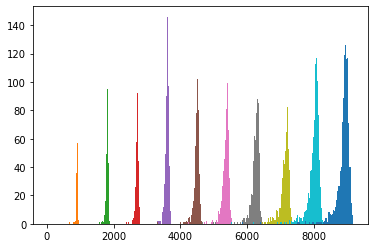

In [118]:
for data_ in data:
    plt.hist(data_, bins=100);
# plt.hist(data[10], bins=100);

In [78]:
energy_mean= [np.mean(data_) for data_ in data]
energy_std = [np.std(data_) for data_ in data]

a = 0.8950251381334146 +- 0.0015025270615134912
b = 1.9382745517708209 +- 1.2823939809999


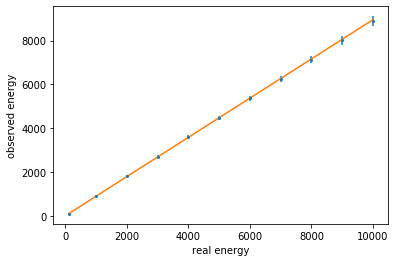

In [79]:
# fit
popt, pcov = spopt.curve_fit(lambda x, a, b: a*x+b, energy, energy_mean, sigma = energy_std)
a, b = popt
delta_a, delta_b = np.sqrt(np.diag(pcov))
plt.errorbar(energy, energy_mean, fmt='o', markersize=2, yerr=energy_std)
plt.xlabel('real energy')
plt.ylabel('observed energy')
x = np.linspace(energy[0], energy[-1], 500)
plt.plot(x, a*x+b)
print(f"a = {a} +- {delta_a}\nb = {b} +- {delta_b}")

In [83]:
def get_real_energy(E_observed):
    return(E_observed - b) / a

In [90]:
f = open("energy_reduction.txt","r")
energy_real = 5500

data_reduction = []
for line in f:
    if line == '\n':
        break
    data_reduction.append(float(line[:-2]))
data_reduction = np.array(data_reduction)

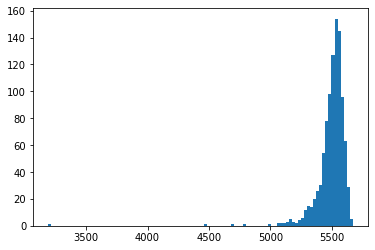

In [160]:
data_real = get_real_energy(data_reduction)

n, bins, patches = plt.hist(data_real, bins=100)

data_cut = np.array(list(filter(lambda x: x > 5300, data_real)))

5513.303267635896 70.47653816811535


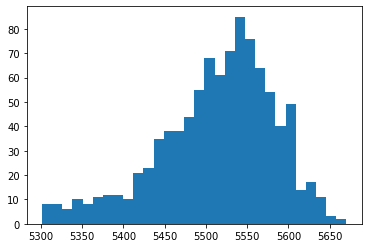

In [162]:
n, bins, patches = plt.hist(data_cut, bins=30)
(mu, sigma) = norm.fit(data_cut)
print(mu, sigma)